<a href="https://colab.research.google.com/github/Noa810/gal/blob/main/avocado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> Sleep, Health, and Lifestyle</h1>
<img src="https://storage.googleapis.com/kaggle-datasets-images/7377614/11751638/68656c1be8d6c1df97a1b0fb7abdd4c1/dataset-cover.jpg?t=2025-05-12-19-29-08">

<div dir="rtl">
מגישה: נעה בן דוד<br>
בית ספר:מדעים<br>
תעודת זהות: 0218512291
<br>
מורה: מיכל מנדל
<br>
תאריך הגשה:

<div dir="rtl">
קישור לdataset מקאגל-
<br>


https://www.kaggle.com/datasets/amldvvs/avocado-ripeness-classification-dataset


https://www.kaggle.com/datasets/yasserh/wine-quality-dataset

מידע על מאגר הנתונים(מקאגל)-
<br>
אבוקדו האס הוא זן פופולרי של אבוקדו הידוע בקליפה הייחודית, ירוק כהה עד שחור ובשר הקרמי והחמאתי כשהוא בשל. זהו פרי גדול, והוא הזן המסחרי הנפוץ ביותר בעולם.

מערך נתונים סינתטי המדמה מדידות המיועד למשימת סיווג בחיזוי שלבי בשלות האבוקדו באמצעות מאפיינים פיזיים.

In [145]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
!pip install scikit-learn
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix , classification_report ,ConfusionMatrixDisplay

In [146]:
df = pd.read_csv('/content/WineQT.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [147]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [149]:
# אין ערכים חסרים
df.dropna(axis=0)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [150]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

In [151]:
df.nunique()

,0
fixed acidity,91
volatile acidity,135
citric acid,77
residual sugar,80
chlorides,131
free sulfur dioxide,53
total sulfur dioxide,138
density,388
pH,87
sulphates,89


In [152]:
df.select_dtypes(include="object").nunique()

,0


In [153]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [154]:
#df['ripeness'] = df['ripeness'].str.replace

# **ויזואליזציה**

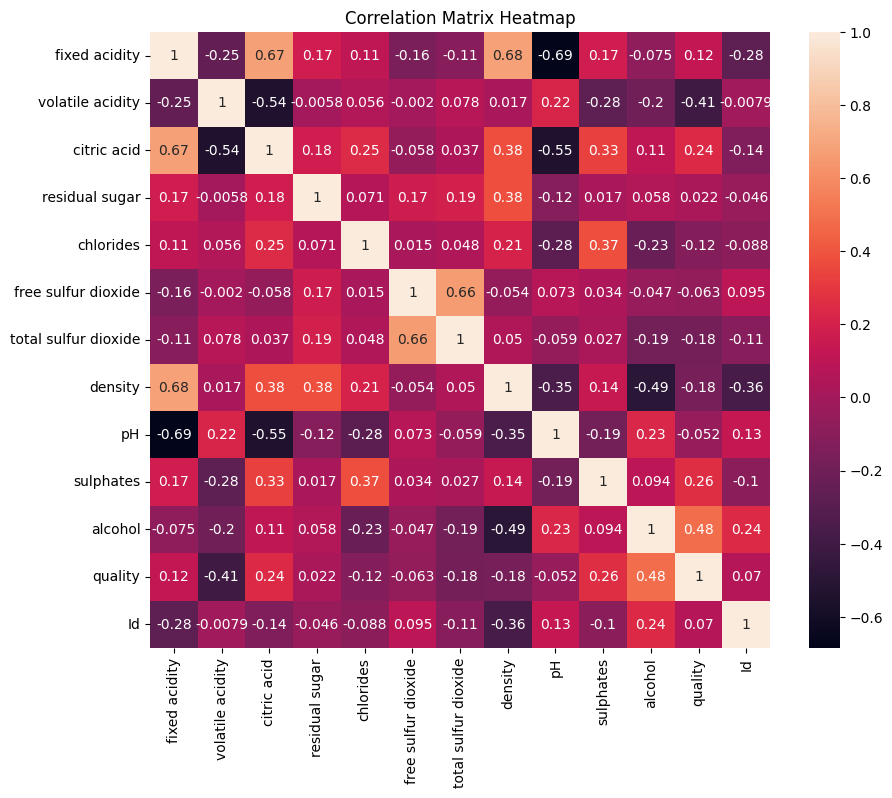

In [155]:

# אני שומרת את הפקודה corr בתור משתנה בשביל ליצור heatmap
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(10,8))
plt.title('Correlation Matrix Heatmap')

ax = sns.heatmap(corr_matrix, annot=True)

In [156]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = df['firmness'] , y = df['size_cm3'])
plt.show()

KeyError: 'firmness'

<Figure size 1000x1000 with 0 Axes>

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = df['sound_db'] , y = df['size_cm3'])
plt.show()

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = df['sound_db'] , y = df['firmness'])
plt.show()

In [ ]:
plt.figure(figsize=(10,10))
sns.histplot(x = df['firmness'] , y = df['size_cm3'])

# **KNN**

In [ ]:
x = df.drop(["color_category"],axis=1).to_numpy()
x.shape

In [ ]:
df.info()

In [ ]:
y = df['ripeness'].to_numpy()
y.shape

In [ ]:
#שליחת הנתונים לאימון ובדיקה
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,\
                                               shuffle=True,random_state=100)

print("train: ",X_train.shape,y_train.shape)

print("test: ",X_test.shape,y_test.shape)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("min: {} max: {}".format(X_train.min(),X_train.max()))
print("min: {} max: {}".format(X_test.min(),X_test.max()))

#נרמול נתונים בשיטת minmax

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#11
pipe = Pipeline([
        ('scale', StandardScaler()),
        ('knn', KNeighborsRegressor())
        ])

#12
param_grid = {
    'knn__n_neighbors' :[k for k in range(1,150,20)]
}

In [ ]:
#13
knn_clf = GridSearchCV(pipe, param_grid=param_grid, cv=5, verbose=1)
knn_clf.fit(X_train, y_train)

In [ ]:
#14
cv_results = pd.DataFrame(knn_clf.cv_results_)
print(cv_results[['param_knn__n_neighbors','mean_test_score','rank_test_score']].sort_values('rank_test_score'))


In [ ]:
best_k = knn_clf.best_params_['knn__n_neighbors']
print("The best k is: ",best_k)

Knn1 = KNeighborsRegressor(n_neighbors=best_k)
Knn1.fit(X_train,y_train)

In [ ]:
y_pred = Knn1.predict(X_test)
y_pred.shape

In [ ]:
fig,ax = plt.subplots(figsize=(10,10))
confusion_matrix= ConfusionMatrixDisplay.from_predictions(y_test,y_pred,ax=ax)